In [1]:
import spot
spot.setup()

# Support for parity games

The support for parity games is currently quite rudimentary, as Spot currently only uses those games in `ltlsynt`.

In essence, a parity game is just a parity automaton with a property named `state-player` that stores the player owning each state.  The players are named 0 and 1.

Player 1 is winning if it has a strategy to satisfy the acceptance condition regardless of player 0's moves.
Player 0 is winning if it has a strategy to not satisfy the acceptance codition regardless of player 1's moves.

## Input/Output

An extension of the HOA format makes it possible to store the `state-player` property.  This allows us to read the parity game constructed by `ltlsynt` using `spot.automaton()` like any other automaton.

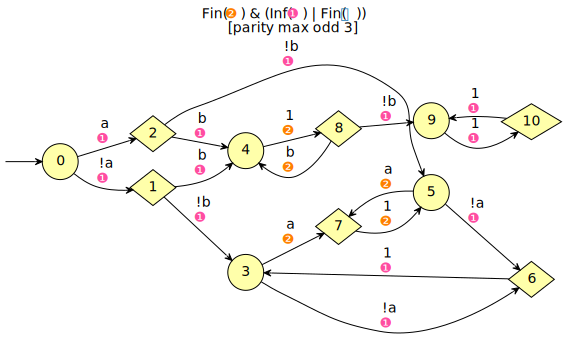

In [2]:
game = spot.automaton("ltlsynt --ins=a --outs=b -f '!b & GFa <-> Gb' --print-game-hoa |");
game

In the graphical output, player 0 is represented by circles (or ellipses or rounded rectangles depending on the situations), while player 1's states are diamond shaped.  In the case of `ltlsynt`, player 0 plays the role of the environment, and player 1 plays the role of the controler.

In the HOA output, a header `spot-state-player` (or `spot.state-player` in HOA 1.1) lists the owner of each state.

In [3]:
print(game.to_str('hoa'))

HOA: v1
States: 11
Start: 0
AP: 2 "b" "a"
acc-name: parity max odd 3
Acceptance: 3 Fin(2) & (Inf(1) | Fin(0))
properties: trans-labels explicit-labels trans-acc colored complete
properties: deterministic
spot-state-player: 0 1 1 0 0 0 1 1 1 0 1
--BODY--
State: 0
[!1] 1 {1}
[1] 2 {1}
State: 1
[!0] 3 {1}
[0] 4 {1}
State: 2
[0] 4 {1}
[!0] 5 {1}
State: 3
[!1] 6 {1}
[1] 7 {2}
State: 4
[t] 8 {2}
State: 5
[1] 7 {2}
[!1] 6 {1}
State: 6
[t] 3 {1}
State: 7
[t] 5 {2}
State: 8
[0] 4 {2}
[!0] 9 {1}
State: 9
[t] 10 {1}
State: 10
[t] 9 {1}
--END--


# Solving games

The `parity_game_solve()` function returns a `solved_game` object.

In [4]:
sol = spot.parity_game_solve(game)

The solved game can be queried to know if a player is winning when the game starts in some given.

In [5]:
sol.player_winning_at(1, game.get_init_state_number())

True

Calling the `highlight_strategy` method will decorate the original game with colors showing the winning region (states from which a player has a strategy to win), and strategy (which transition should be used for each winning state owned by that player) of a given player.   Let's paint the strategy of player 1 in green (color 4) for this example:

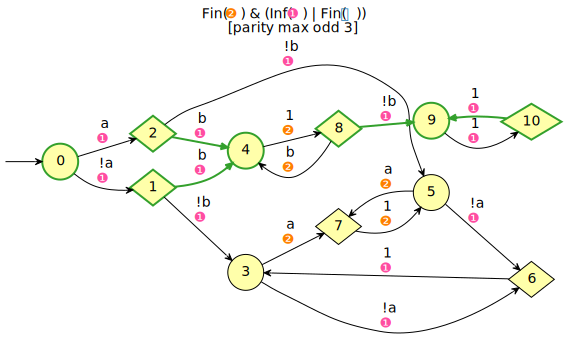

In [6]:
sol.highlight_strategy(1, 4)

Because `highlight_strategy` simply decorates the original automaton, we can call it a second time to show that player 0 could win if it had a way to reach the red (color 5) region and play the red strategy.

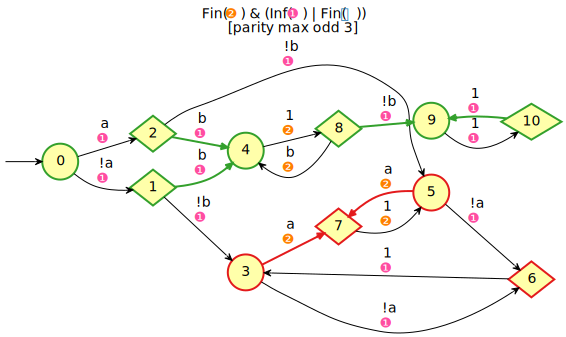

In [7]:
sol.highlight_strategy(0, 5)